In [21]:
f_mnist_data = {0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('fashion-mnist_test.csv/fashion-mnist_test.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([7, 7, 4, ..., 2, 2, 1], dtype=int64)

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 200 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [16]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.15, 1000)


Iteration:  0
[5 5 4 ... 4 4 4] [7 7 4 ... 2 2 1]
0.1632222222222222
Iteration:  200
[7 7 1 ... 2 6 1] [7 7 4 ... 2 2 1]
0.687
Iteration:  400
[7 7 3 ... 2 8 1] [7 7 4 ... 2 2 1]
0.7434444444444445
Iteration:  600
[7 7 4 ... 2 8 1] [7 7 4 ... 2 2 1]
0.7718888888888888
Iteration:  800
[7 7 4 ... 2 6 1] [7 7 4 ... 2 2 1]
0.7894444444444444


In [26]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = int(get_predictions(A2))
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", f_mnist_data[prediction])
    print("Label: ", f_mnist_data[label])
    
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  Sneaker
Label:  Sneaker


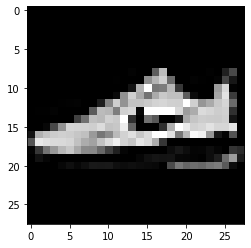

Prediction:  Sneaker
Label:  Sneaker


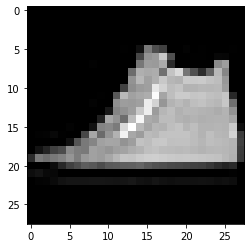

Prediction:  Coat
Label:  Coat


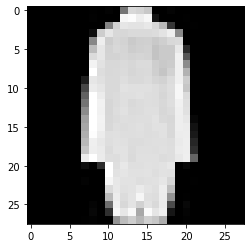

Prediction:  Pullover
Label:  Pullover


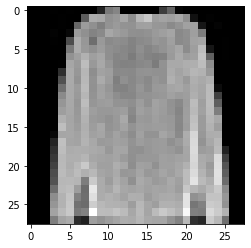

In [27]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [19]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 2 4 2 7 4 2 1 2 4 3 7 2 7 5 8 4 7 9 4 6 5 2 2 3 6 5 1 3 9 9 7 1 2 6 3 2
 3 4 3 2 5 4 0 2 7 9 6 3 0 0 7 3 4 0 7 9 1 1 0 7 7 0 1 5 0 3 3 8 2 8 8 1 2
 0 4 4 3 4 0 5 2 1 9 2 8 1 8 4 3 0 8 2 1 8 9 9 3 5 5 2 4 7 5 0 1 5 2 4 5 8
 8 4 4 7 7 0 2 3 2 2 3 5 4 4 2 5 1 7 7 3 7 8 0 8 8 0 0 4 8 5 1 6 7 3 0 2 5
 0 7 3 9 8 9 1 8 3 6 0 2 1 1 9 3 2 5 6 0 6 1 3 4 6 8 3 7 9 8 6 2 7 1 1 3 3
 5 7 3 7 4 3 7 3 5 4 6 7 1 0 8 3 6 0 2 9 0 1 0 3 8 9 5 8 9 6 1 4 1 9 6 2 1
 0 3 3 5 9 9 0 7 6 4 1 8 0 6 0 7 6 3 1 2 2 9 7 1 4 5 0 5 5 3 7 6 0 2 6 5 0
 6 0 0 8 5 3 8 8 2 9 0 5 6 2 3 0 4 3 4 7 2 0 5 2 9 6 4 3 4 6 1 1 5 5 9 0 9
 4 7 9 6 0 6 8 2 5 4 9 0 0 0 6 4 8 9 2 7 4 4 0 4 5 9 8 3 0 6 0 2 2 6 3 9 1
 9 7 2 5 5 6 6 2 0 3 6 2 3 4 6 1 1 0 3 5 0 8 8 8 1 0 4 3 1 2 0 5 7 0 0 0 7
 9 7 4 3 2 2 3 4 0 8 6 4 5 6 3 6 9 1 3 0 3 0 1 7 9 1 2 1 9 0 5 7 3 8 5 9 4
 6 2 9 4 1 5 7 3 9 2 9 9 0 5 9 1 3 6 9 4 5 2 1 0 9 9 1 8 9 8 1 1 0 1 8 0 3
 3 8 5 5 3 7 1 2 0 8 2 1 0 4 5 8 5 7 8 0 9 9 9 1 5 0 0 2 3 0 2 1 8 6 6 8 7
 6 6 9 9 0 3 1 8 9 0 4 7 

0.801